Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consist of images of 9 types of different skin cancers namely

Actinic keratosis
Basal cell carcinoma
Dermatofibroma
Melanoma
Nevus
Pigmented benign keratosis
Seborrheic keratosis
Squamous cell carcinoma
Vascular lesion
The model should be accurately predict melonoma cancer.

## Importing important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Preparing Dataset

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
##  Train dataset

train_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## validation dataset

val_ds = keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
## Test Dataset

test_ds = keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                               seed=123,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb')

Found 118 files belonging to 9 classes.


In [10]:
# List out all the classes of skin cancer and store them in a list.

class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualizing data

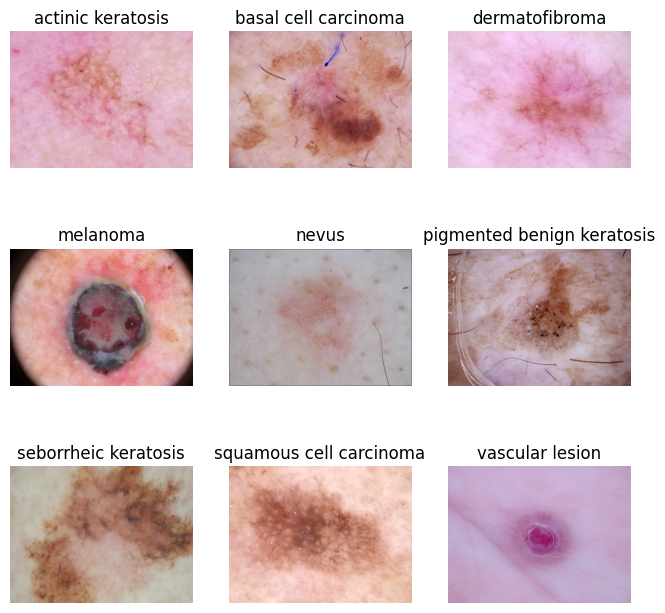

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  image = plt.imread(list(data_dir_train.glob(class_names[i]+"*/*.jpg"))[0])
  plt.title(class_names[i])
  plt.imshow(image)
  plt.axis("off")
#plt.tight_layout()
plt.show()
### your code goes here, you can use training or validation data to visualize


### Optimizing processes using Autotune

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


### Defining function to visualize the trade off between train and validation accuracy with respect to distinct epochs


In [13]:
def plot_tradeoff(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]


In [14]:
### Your code goes here
model=keras.Sequential()

model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())


model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))


## Compile the model

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 259200)            0

## Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 519s 5s/step - loss: 2.8193 - accuracy: 0.2115 - val_loss: 1.8899 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 200s 4s/step - loss: 1.7490 - accuracy: 0.3594 - val_loss: 1.5895 - val_accuracy: 0.4385
Epoch 3/20
56/56 [==============================] - 199s 4s/step - loss: 1.4646 - accuracy: 0.4927 - val_loss: 1.6003 - val_accuracy: 0.4676
Epoch 4/20
56/56 [==============================] - 192s 3s/step - loss: 1.3298 - accuracy: 0.5385 - val_loss: 1.3970 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 194s 3s/step - loss: 1.1899 - accuracy: 0.5815 - val_loss: 1.4678 - val_accuracy: 0.4698
Epoch 6/20
56/56 [==============================] - 200s 4s/step - loss: 1.1389 - accuracy: 0.6088 - val_loss: 1.5523 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 194s 3s/step - loss: 0.9533 - accuracy: 0.6847 - val_loss: 1.5705 - val_accuracy: 0.5190
Epoch 8/20
56

## Visualizing training results

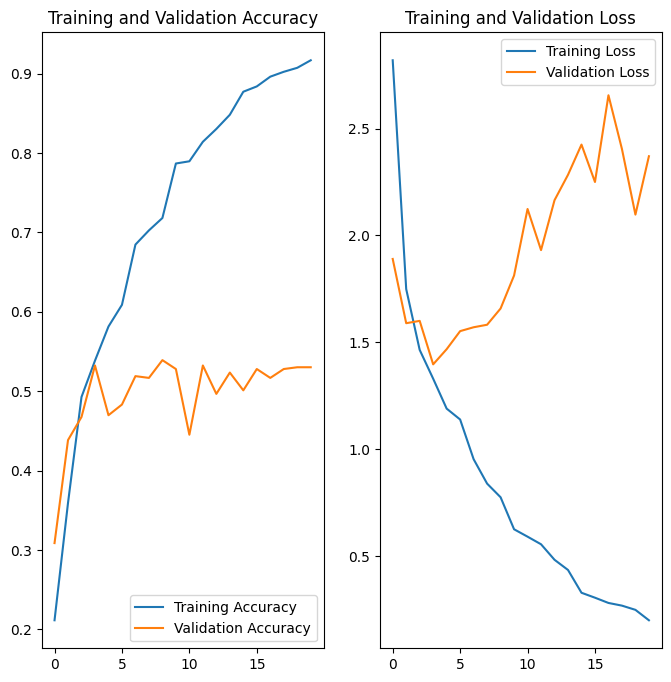

In [18]:
plot_tradeoff(history,epochs)

Some of the important findings from the initial model

Difference in training accuracy and validation accuracy after 20 epochs indicate the overfitting of model.

In the initial 4-5 epochs can be place where the model can be stopped learning as the overfitting starts after 4 epochs.

But stopping at 4-5 has less accuracy around 50% almost a random model.

Hence, we address overfitting by adding dropout layers and batch normalization layer

## Write your findings here

In [19]:
# data augumentation strategy
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model=keras.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [21]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 200s 4s/step - loss: 3.3383 - accuracy: 0.1953 - val_loss: 1.8914 - val_accuracy: 0.2886
Epoch 2/20
56/56 [==============================] - 198s 4s/step - loss: 1.7365 - accuracy: 0.3739 - val_loss: 1.7170 - val_accuracy: 0.3691
Epoch 3/20
56/56 [==============================] - 198s 4s/step - loss: 1.5503 - accuracy: 0.4509 - val_loss: 1.5387 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 200s 4s/step - loss: 1.5742 - accuracy: 0.4593 - val_loss: 1.7900 - val_accuracy: 0.3535
Epoch 5/20
56/56 [==============================] - 198s 4s/step - loss: 1.6849 - accuracy: 0.3956 - val_loss: 1.5356 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 200s 4s/step - loss: 1.4843 - accuracy: 0.4927 - val_loss: 1.6226 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 198s 4s/step - loss: 1.4369 - accuracy: 0.4967 - val_loss: 1.5368 - val_accuracy: 0.4810
Epoch 8/20
56

## Visualizing the training results

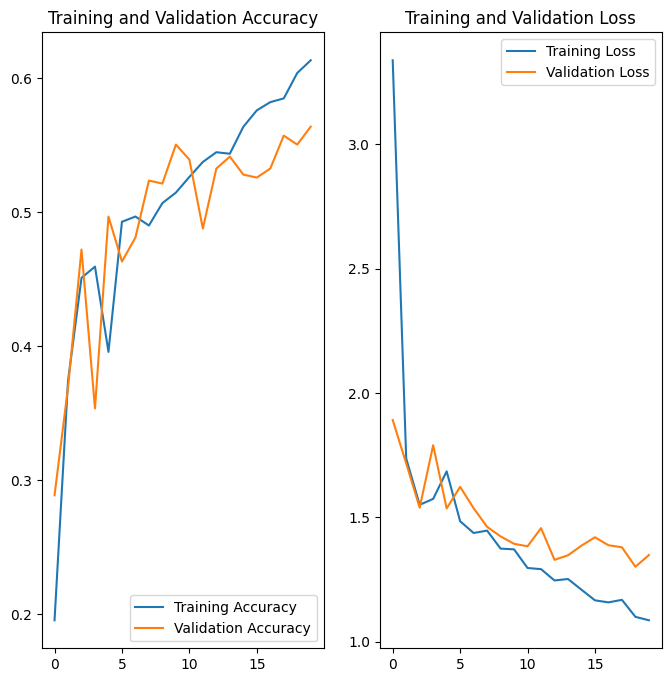

In [23]:
plot_tradeoff(history,epochs)

## Observations:





1.  Data Augmentation layer did address the issue of overfitting till some extent
2.  Learning of model is yet to be improved.
3.   Nearby 10 epochs we have optimum loss as well as nearby same train and validation accuracy but again the model is slightly better than random model.
4.  Hence, we look at the distribution of class and try to address data imbalance if exist.



### Todo: Find the distribution of classes in the training dataset.

### Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

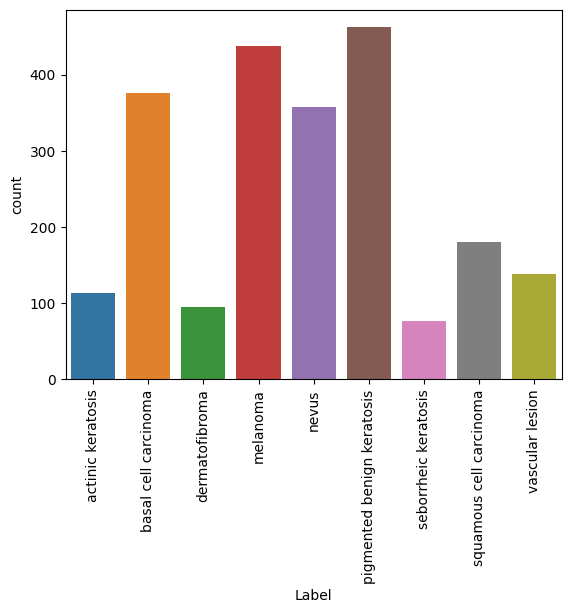

In [24]:
## Your code goes here.
import seaborn as sns
paths =[]
labels = []
for i in class_names:
      for j in data_dir_train.glob(i+'/*.jpg'):
        paths.append(str(j))
        labels.append(i)
dataframe = dict(zip(paths, labels))
original_df = pd.DataFrame(list(dataframe.items()),columns = ['Path','Label'])
sns.countplot(data=original_df,x='Label')
plt.xticks(rotation=90)
plt.show()



*   Pigmented Beign Keratosis, melanoma and basel cell carcinoma accounts for around 60% of the data.
Seborrheic keratosis has the least amount of images.
Seborrheic constitute of around 4% data only where as 22% resuting in huge data imbalance.
In an ideal state (uniform distribution) we should have around 250 images for each class.
Hence, we address the issue of data imbalance using augmentor package



In [26]:
!pip install Augmentor
import Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
path_to_training_dataset="/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+i,output_directory="/content/drive/MyDrive/CNN_assignment/balanced_dataset/"+i+"/")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/actinic keratosis/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3195CFC160>: 100%|██████████| 500/500 [00:19<00:00, 25.61 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/basal cell carcinoma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3195E91930>: 100%|██████████| 500/500 [00:21<00:00, 22.79 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/dermatofibroma/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31944ED510>: 100%|██████████| 500/500 [00:17<00:00, 28.38 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/melanoma/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3195E34D00>: 100%|██████████| 500/500 [01:19<00:00,  6.27 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/nevus/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F317526B490>: 100%|██████████| 500/500 [01:17<00:00,  6.48 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/pigmented benign keratosis/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31878DF4F0>: 100%|██████████| 500/500 [00:19<00:00, 26.11 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/seborrheic keratosis/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F319C0EC7C0>: 100%|██████████| 500/500 [00:35<00:00, 14.12 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/squamous cell carcinoma/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3195D77310>: 100%|██████████| 500/500 [00:17<00:00, 28.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/balanced_dataset/vascular lesion/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F3195E93790>: 100%|██████████| 500/500 [00:16<00:00, 30.20 Samples/s]


Augmentor has stored the augmented images in the Balanced dataset directory of each of the sub-directories of skin cancer types. Lets take a look at total count of augmented images.

In [29]:
from pathlib import Path

data_dir_train = Path("/content/drive/MyDrive/CNN_assignment/balanced_dataset/")
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)


4500


### Distribution of augmented data after adding new images to the original training data

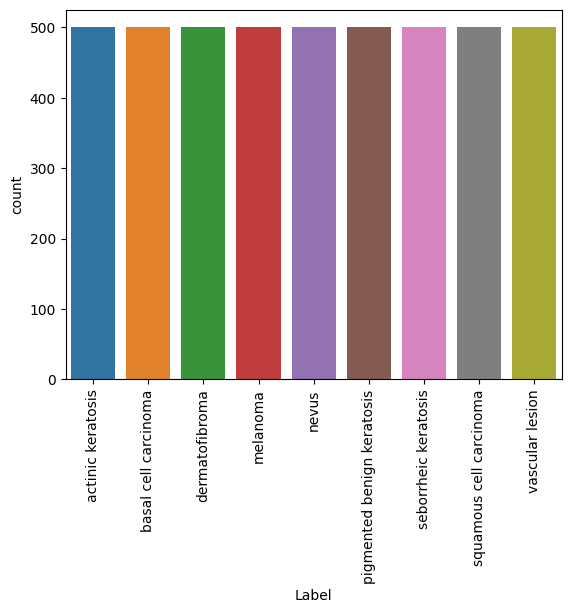

In [30]:
data_dir_train = Path("/content/drive/MyDrive/CNN_assignment/balanced_dataset/")
paths =[]
labels = []
for i in class_names:
      for j in data_dir_train.glob(i+'/*.jpg'):
        paths.append(str(j))
        labels.append(i)
dataframe = dict(zip(paths, labels))
original_df = pd.DataFrame(list(dataframe.items()),columns = ['Path','Label'])
sns.countplot(data=original_df,x='Label')
plt.xticks(rotation=90)
plt.show()

In [31]:
original_df['Label'].value_counts()


actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Initiating some parameters

In [32]:
batch_size = 32
img_height = 180
img_width = 180


## Training dataset

In [33]:
data_dir_train="/content/drive/MyDrive/CNN_assignment/balanced_dataset"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


## validation dataset

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


## Building the model on new dataset

In [35]:
# CNN Model
model=keras.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))


In [36]:
#Compilation of model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                  

## Training the model on resampled data

In [37]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 [==============================] - 427s 4s/step - loss: 2.2567 - accuracy: 0.2664 - val_loss: 1.7194 - val_accuracy: 0.3389
Epoch 2/30
113/113 [==============================] - 425s 4s/step - loss: 1.5725 - accuracy: 0.3861 - val_loss: 1.5944 - val_accuracy: 0.3700
Epoch 3/30
113/113 [==============================] - 427s 4s/step - loss: 1.4556 - accuracy: 0.4372 - val_loss: 1.5741 - val_accuracy: 0.4033
Epoch 4/30
113/113 [==============================] - 423s 4s/step - loss: 1.3869 - accuracy: 0.4672 - val_loss: 1.3214 - val_accuracy: 0.4844
Epoch 5/30
113/113 [==============================] - 425s 4s/step - loss: 1.3643 - accuracy: 0.4747 - val_loss: 1.2774 - val_accuracy: 0.5178
Epoch 6/30
113/113 [==============================] - 425s 4s/step - loss: 1.2565 - accuracy: 0.5131 - val_loss: 1.2262 - val_accuracy: 0.5422
Epoch 7/30
113/113 [==============================] - 421s 4s/step - loss: 1.2581 - accuracy: 0.5233 - val_loss: 1.3858 - val_accuracy: 0.4356

## Visualizing model results

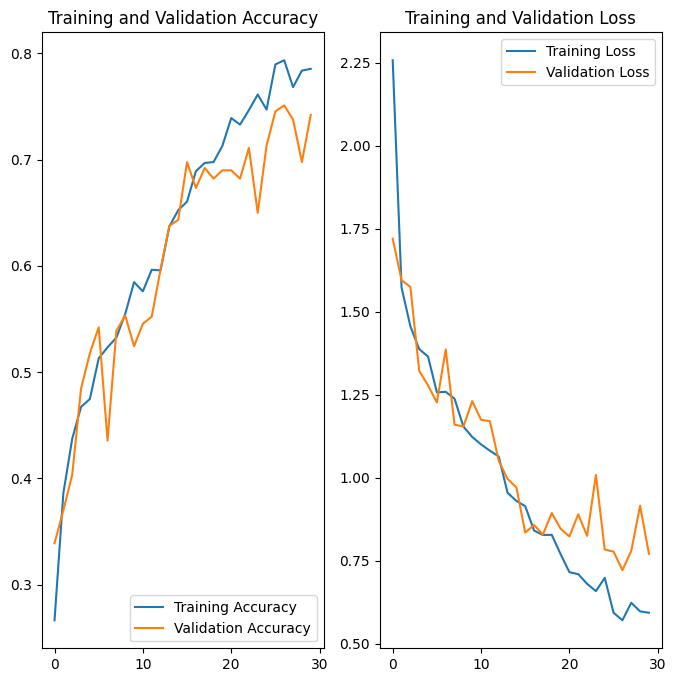

In [38]:
plot_tradeoff(history,epochs)


### Observations




1. Resampling using augmentor pipeline actually solved the problem of overfitting.

2. It also increased the accuracy of the model to about 75%.

